<a href="https://colab.research.google.com/github/standroidbeta/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [5]:
# TODO - during class, but please help!
lambda_heights = [72, 72, 77, 72, 73, 67, 64, 58, 63, 78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})

df.head(10)

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [6]:
df['heights'].mean()

69.6

In [7]:
import random
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))

print(population)
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [8]:
sample = random.sample(population, 100)

print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
100


In [9]:
df = pd.DataFrame({'likes_coke': sample})
df.head()

df['likes_coke'].mean()

0.46

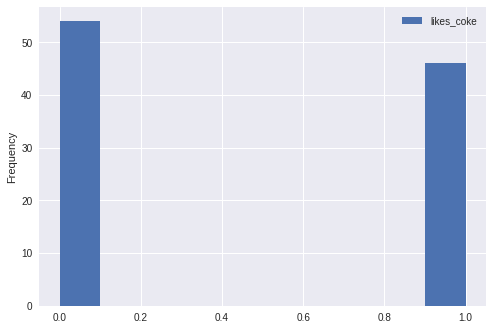

In [10]:
df.plot.hist();

In [11]:
df['likes_coke'].describe()

count    100.000000
mean       0.460000
std        0.500908
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [12]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print('Population Mean:', mean(population))
print('Sample Mean', mean(sample))

Population Mean: 0.507
Sample Mean 0.46


In [13]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)

variance(df['likes_coke'])

0.25090909090909086

In [14]:
def stddev(list):
  var = variance(list)
  return var**(1/2)

stddev(df['likes_coke'])

0.5009082659620331

<img src="https://www.ahajournals.org/cms/attachment/850f8023-e028-4694-a946-bbdbdaa9009b/15mm6.jpg"  width='200'/>

In [15]:
n = len(df['likes_coke'])
t_stat = (mean(df['likes_coke']) - .5)/(stddev(df['likes_coke'])/n**(1/2))

print(t_stat)

-0.7985494095046901


In [0]:
# dir(scipy.stats)

In [17]:
stats.ttest_1samp(df['likes_coke'], .5)

Ttest_1sampResult(statistic=-0.7985494095046901, pvalue=0.4264632540527489)

\begin{align}
t = \frac{\text{variance between groups}}{\text{variance within groups}}
\end{align}

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [18]:
# TODO - your code here!
votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [19]:
votes.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [20]:
votes = votes.rename(columns={0: 'party:', 1: 'handicapped-infants:', 2: 'water-project-cost-sharing:', 3: 'adoption-of-the-budget-resolution:', 
                      4: 'physician-fee-freeze:', 5: 'el-salvador-aid:', 6: 'religious-groups-in-schools:', 7: 'anti-satellite-test-ban:',
                      8: 'aid-to-nicaraguan-contras:', 9: 'mx-missile:', 10: 'immigration:', 11: 'synfuels-corporation-cutback:', 12: 'education-spending:', 
                      13: 'superfund-right-to-sue:', 14: 'crime:', 15: 'duty-free-exports:', 16: 'export-administration-act-south-africa:'})

votes.head()

,party:,handicapped-infants:,water-project-cost-sharing:,adoption-of-the-budget-resolution:,physician-fee-freeze:,el-salvador-aid:,religious-groups-in-schools:,anti-satellite-test-ban:,aid-to-nicaraguan-contras:,mx-missile:,immigration:,synfuels-corporation-cutback:,education-spending:,superfund-right-to-sue:,crime:,duty-free-exports:,export-administration-act-south-africa:
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [21]:
votes = votes.replace({'?': -1, 'n': 0, 'y': 1})


votes.isnull().sum()

party:                                     0
handicapped-infants:                       0
water-project-cost-sharing:                0
adoption-of-the-budget-resolution:         0
physician-fee-freeze:                      0
el-salvador-aid:                           0
religious-groups-in-schools:               0
anti-satellite-test-ban:                   0
aid-to-nicaraguan-contras:                 0
mx-missile:                                0
immigration:                               0
synfuels-corporation-cutback:              0
education-spending:                        0
superfund-right-to-sue:                    0
crime:                                     0
duty-free-exports:                         0
export-administration-act-south-africa:    0
dtype: int64

In [22]:
votes.head()

,party:,handicapped-infants:,water-project-cost-sharing:,adoption-of-the-budget-resolution:,physician-fee-freeze:,el-salvador-aid:,religious-groups-in-schools:,anti-satellite-test-ban:,aid-to-nicaraguan-contras:,mx-missile:,immigration:,synfuels-corporation-cutback:,education-spending:,superfund-right-to-sue:,crime:,duty-free-exports:,export-administration-act-south-africa:
0,republican,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,democrat,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1


In [27]:
immigration = votes[['party:', 'immigration:']]

immigration.head(100)

,party:,immigration:
0,republican,1
1,republican,0
2,democrat,0
3,democrat,0
4,democrat,0
5,democrat,0
6,democrat,0
7,republican,0
8,republican,0
9,democrat,0


In [24]:
immigration.shape

(435, 2)

In [32]:
immigration_ct = pd.crosstab(immigration['immigration:'], 
                     immigration['party:'])

immigration_ct

party:,democrat,republican
immigration:,,
-1,4,3
0,139,73
1,124,92


In [35]:
stats.ttest_1samp(immigration_ct, .5)

Ttest_1sampResult(statistic=array([2.07162831, 2.05087212]), pvalue=array([0.17409562, 0.17675326]))

In [36]:
budget = votes[['party:', 'adoption-of-the-budget-resolution:']]

budget.head()

,party:,adoption-of-the-budget-resolution:
0,republican,0
1,republican,0
2,democrat,1
3,democrat,1
4,democrat,1


In [38]:
budget_ct = pd.crosstab(budget['adoption-of-the-budget-resolution:'],
                               budget['party:'])

budget_ct

party:,democrat,republican
adoption-of-the-budget-resolution:,,
-1,7,4
0,29,142
1,231,22


In [40]:
stats.ttest_1samp(budget_ct, .5)

Ttest_1sampResult(statistic=array([1.24152202, 1.28137594]), pvalue=array([0.34026678, 0.32855397]))

In [42]:
education = votes[['party:', 'education-spending:']]

education.head()

,party:,education-spending:
0,republican,1
1,republican,1
2,democrat,0
3,democrat,0
4,democrat,-1


In [43]:
education_ct = pd.crosstab(education['education-spending:'],
                           education['party:'])

education_ct

party:,democrat,republican
education-spending:,,
-1,18,13
0,213,20
1,36,135


In [44]:
stats.ttest_1samp(education_ct, .5)

Ttest_1sampResult(statistic=array([1.42243256, 1.4032283 ]), pvalue=array([0.2908474, 0.2956556]))

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars